In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
df=pd.read_csv(r"C:\Users\marya\OneDrive\Desktop\python\Final Project\DOHMH_New_York_City_Restaurant_Inspection_Results_20240714.csv")

In [3]:
df.head().T

,0,1,2,3,4
CAMIS,50153860,50154030,50148326,50089033,50104856
DBA,NaN,NaN,NaN,THE LEGEND'S LOUNGE,NaN
BORO,Manhattan,Manhattan,Manhattan,Manhattan,Bronx
BUILDING,142,198,22,2823,906
STREET,DELANCEY STREET,AVENUE A,WEST 40 STREET,FREDERICK DOUGLASS BOULEVARD,EAST 180 STREET
ZIPCODE,10002.0,10009.0,10018.0,NaN,10460.0
PHONE,9297332003,3473934433,6103683603,9143544662,7189333819
CUISINE DESCRIPTION,NaN,NaN,NaN,NaN,NaN
INSPECTION DATE,01/01/1900,01/01/1900,01/01/1900,01/01/1900,01/01/1900
ACTION,NaN,NaN,NaN,NaN,NaN


In [5]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238596 entries, 0 to 238595
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  238596 non-null  int64  
 1   DBA                    237772 non-null  object 
 2   BORO                   238596 non-null  object 
 3   BUILDING               238155 non-null  object 
 4   STREET                 238583 non-null  object 
 5   ZIPCODE                235760 non-null  float64
 6   PHONE                  238593 non-null  object 
 7   CUISINE DESCRIPTION    235921 non-null  object 
 8   INSPECTION DATE        238596 non-null  object 
 9   ACTION                 235921 non-null  object 
 10  VIOLATION CODE         234625 non-null  object 
 11  VIOLATION DESCRIPTION  234625 non-null  object 
 12  CRITICAL FLAG          238596 non-null  object 
 13  SCORE                  226907 non-null  float64
 14  GRADE                  115282 non-nu

In [6]:
# Convert columns to appropriate data types
df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'], errors='coerce')
df['GRADE DATE'] = pd.to_datetime(df['GRADE DATE'], errors='coerce')
df['RECORD DATE'] = pd.to_datetime(df['RECORD DATE'], errors='coerce')

In [7]:
# Handle missing values
df.fillna({'CRITICAL FLAG': 'Not Critical', 'GRADE': 'Not Graded'}, inplace=True)

In [8]:
# Display the first few rows of the dataset to check the transformations
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50153860,NaN,Manhattan,142,DELANCEY STREET,10002.0,9297332003,NaN,1900-01-01,NaN,...,NaN,40.718096,-73.986829,103.0,1.0,1402.0,1004305.0,1.003530e+09,MN28,NaN
1,50154030,NaN,Manhattan,198,AVENUE A,10009.0,3473934433,NaN,1900-01-01,NaN,...,NaN,40.729338,-73.981123,103.0,2.0,3400.0,1005198.0,1.004060e+09,MN22,NaN
2,50148326,NaN,Manhattan,22,WEST 40 STREET,10018.0,6103683603,NaN,1900-01-01,NaN,...,NaN,40.752589,-73.982791,105.0,4.0,8400.0,1090404.0,1.008418e+09,MN17,NaN
3,50089033,THE LEGEND'S LOUNGE,Manhattan,2823,FREDERICK DOUGLASS BOULEVARD,NaN,9143544662,NaN,1900-01-01,NaN,...,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN
4,50104856,NaN,Bronx,906,EAST 180 STREET,10460.0,7189333819,NaN,1900-01-01,NaN,...,NaN,40.844789,-73.882075,206.0,15.0,36300.0,2114808.0,2.031220e+09,BX17,NaN


In [26]:
# Calculate average inspection score by borough
average_score_by_borough = df.groupby('BORO')['SCORE'].mean().reset_index()

average_score_by_borough

,BORO,SCORE
0,0,NaN
1,Bronx,22.304561
2,Brooklyn,24.206144
3,Manhattan,22.909985
4,Queens,24.485491
5,Staten Island,20.650625


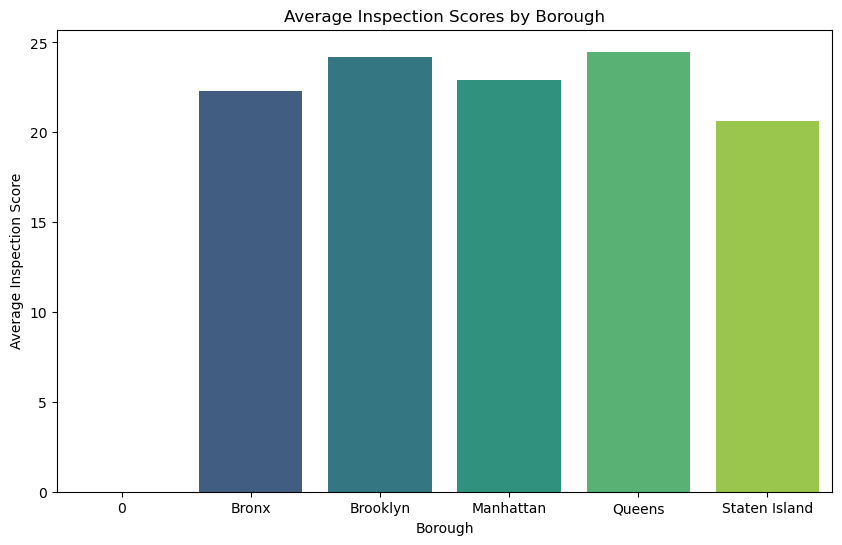

In [34]:
# Plot the average inspection scores by borough
plt.figure(figsize=(10, 6))
sn.barplot(data=average_score_by_borough, x='BORO', y='SCORE', palette='viridis')
plt.title('Average Inspection Scores by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Inspection Score')
plt.show()

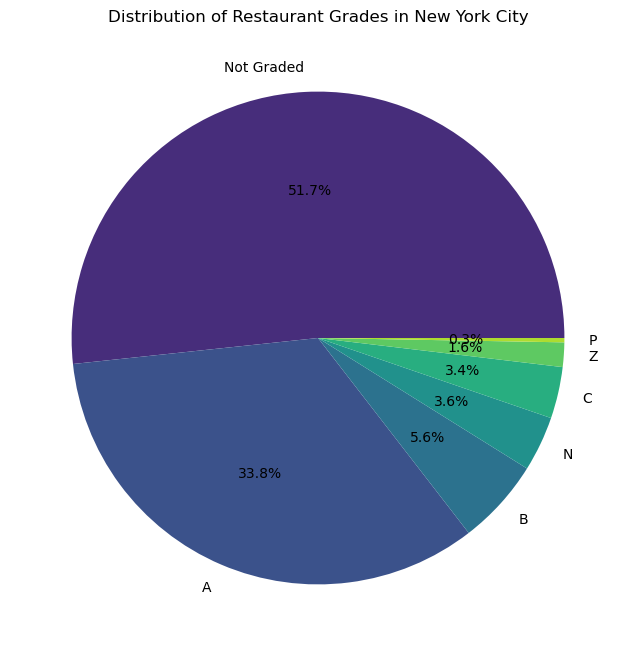

In [20]:
# Count the number of restaurants for each grade
grade_distribution = df['GRADE'].value_counts()



# Plot the distribution of grades
plt.figure(figsize=(8, 8))
plt.pie(grade_distribution, labels=grade_distribution.index, autopct='%1.1f%%', colors=sn.color_palette('viridis', len(grade_distribution)))
plt.title('Distribution of Restaurant Grades in New York City')
plt.show()

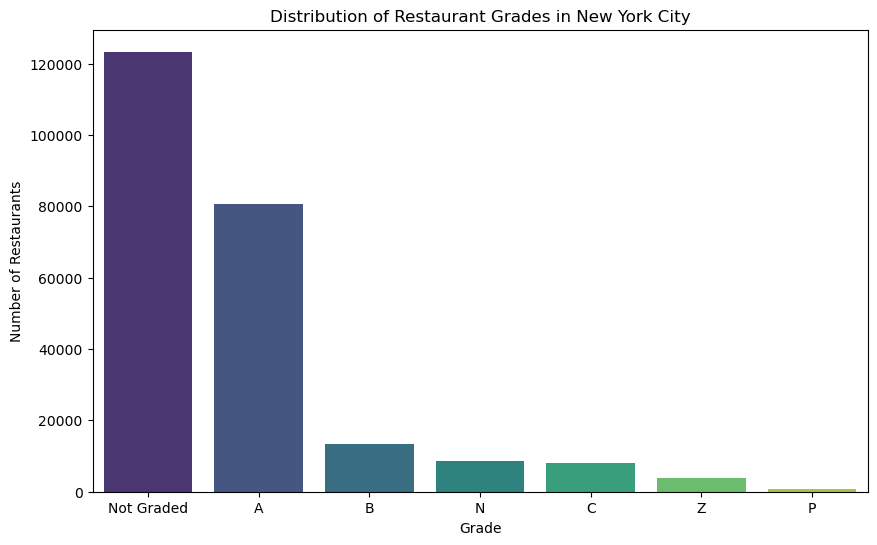

In [25]:
# Create a bar chart for the distribution of grades
plt.figure(figsize=(10, 6))
sn.countplot(x='GRADE', data=df, palette='viridis', order=grade_distribution.index)
plt.title('Distribution of Restaurant Grades in New York City')
plt.xlabel('Grade')
plt.ylabel('Number of Restaurants')
plt.show()

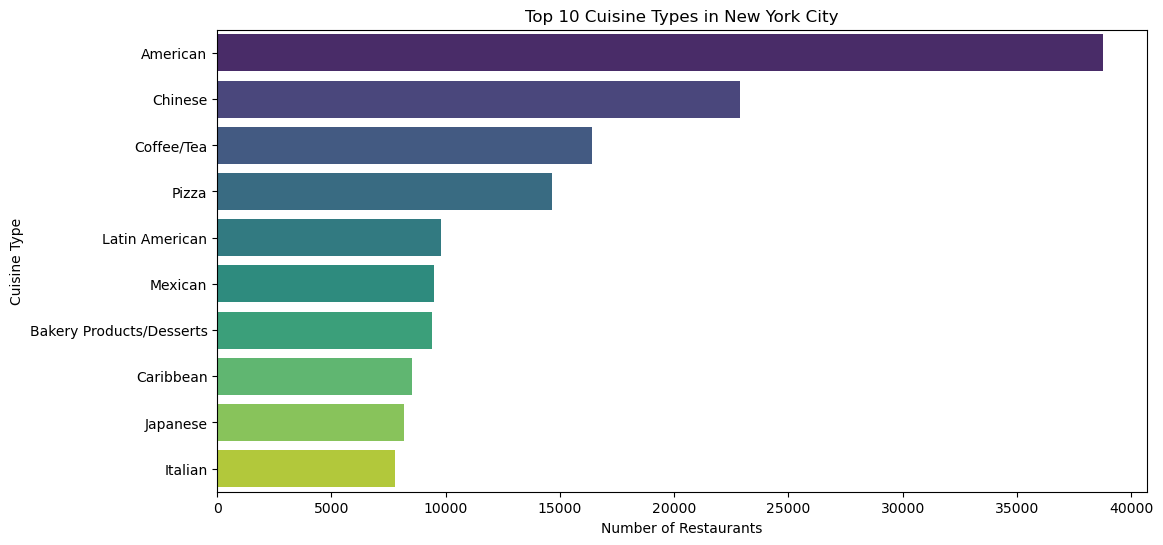

In [27]:
# Count the number of restaurants for each cuisine type
cuisine_distribution = df['CUISINE DESCRIPTION'].value_counts().head(10)

# Plot the top 10 cuisine types
plt.figure(figsize=(12, 6))
sn.barplot(x=cuisine_distribution.values, y=cuisine_distribution.index, palette='viridis')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Cuisine Types in New York City')
plt.show()

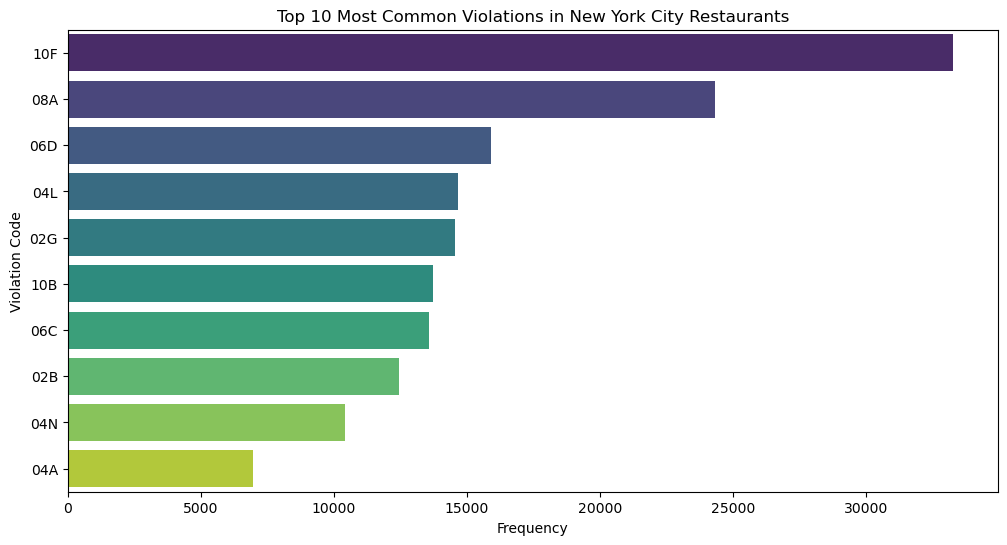

In [28]:
# Count the frequency of each violation code
violation_distribution = df['VIOLATION CODE'].value_counts().head(10)

# Plot the top 10 most common violations
plt.figure(figsize=(12, 6))
sn.barplot(x=violation_distribution.values, y=violation_distribution.index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Violation Code')
plt.title('Top 10 Most Common Violations in New York City Restaurants')
plt.show()

C:\Users\marya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


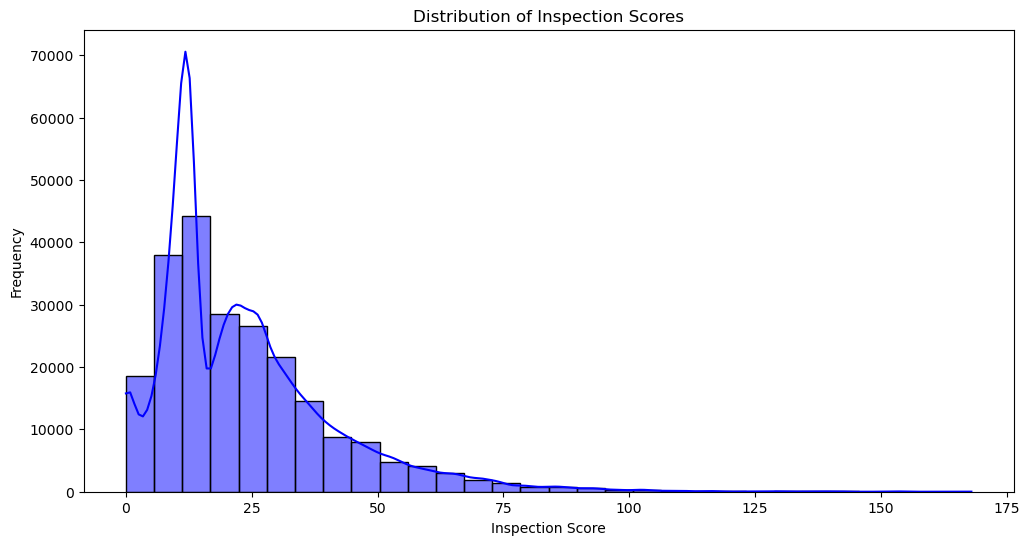

In [31]:
# Plot the distribution of inspection scores
plt.figure(figsize=(12, 6))
sn.histplot(df['SCORE'].dropna(), bins=30, kde=True, color='blue')
plt.xlabel('Inspection Score')
plt.ylabel('Frequency')
plt.title('Distribution of Inspection Scores')
plt.show()

<Figure size 1200x600 with 0 Axes>

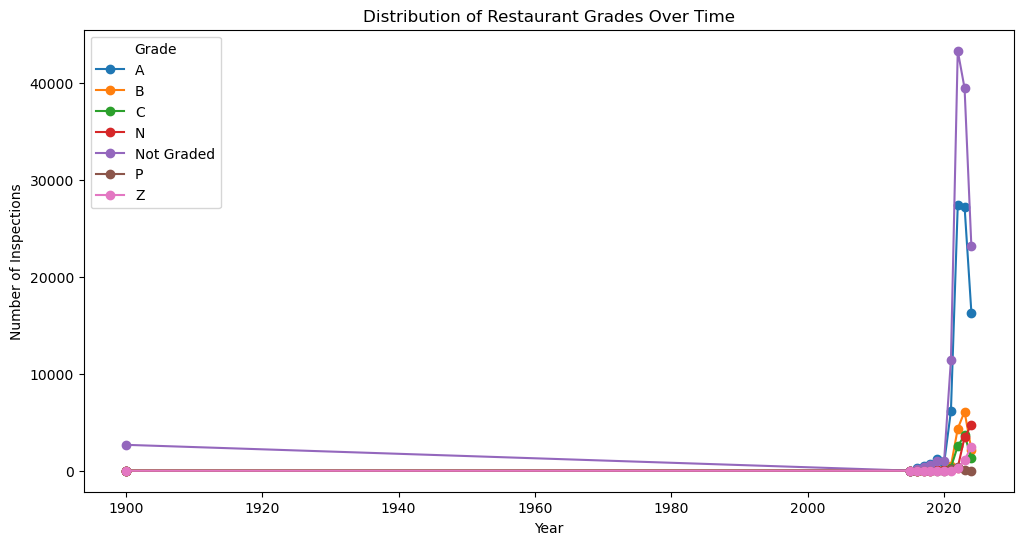

In [32]:
# Convert 'INSPECTION DATE' to datetime
df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'])

# Group by year and grade
grade_over_time = df.groupby([df['INSPECTION DATE'].dt.year, 'GRADE']).size().unstack().fillna(0)

# Plot the grade distribution over time
plt.figure(figsize=(12, 6))
grade_over_time.plot(kind='line', marker='o', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Inspections')
plt.title('Distribution of Restaurant Grades Over Time')
plt.legend(title='Grade')
plt.show()

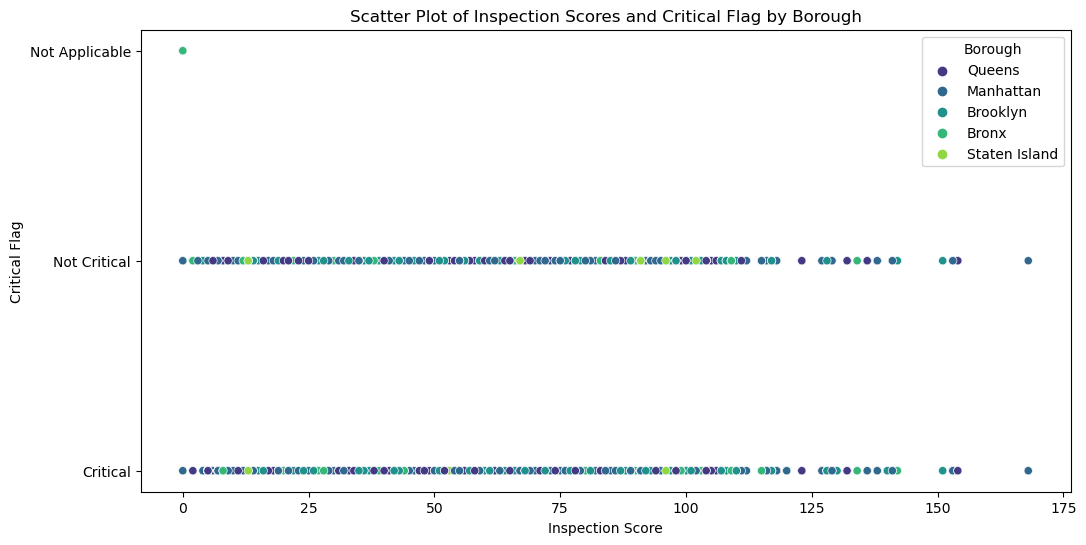

In [47]:
# Filter out invalid data
df = df.dropna(subset=['SCORE', 'CRITICAL FLAG'])

# Create a scatter plot
plt.figure(figsize=(12, 6))
sn.scatterplot(data=df, x='SCORE', y='CRITICAL FLAG', hue='BORO', palette='viridis')
plt.title('Scatter Plot of Inspection Scores and Critical Flag by Borough')
plt.xlabel('Inspection Score')
plt.ylabel('Critical Flag')
plt.legend(title='Borough')
plt.show()

In [65]:
from IPython.display import HTML
HTML('<i><font color="green">The scatter plot helps to identify patterns or correlations between inspection scores and critical flags across various boroughs. The plot is customized with a title, labeled axes, and a legend to enhance interpretability, providing a clear and informative visual representation of the data.</font></i>')